<a href="https://colab.research.google.com/github/kimtomato/Kaggle_Project/blob/master/titanic_tutorial_first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kimtomato","key":"192f0ed7ad3b2981ab307f629f96ca08"}'}

In [3]:
ls -1ha kaggle.json

kaggle.json


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         59           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes         90           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        387           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        163           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1447           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      15306           False  
house-pr

In [6]:
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 65.6MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.08MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 27.1MB/s]


In [7]:
!ls

gender_submission.csv  kaggle.json  sample_data  test.csv  train.csv


In [9]:
import numpy as np #numerical 계산이 가능한 library
import pandas as pd #data frame
import matplotlib.pyplot as plt 
import seaborn as sns  #data visualization

plt.style.use('seaborn')
# 그림의 스타일을 지정 matplot 라이브러리 스타일을 seaborn으로
sns.set(font_scale =2.5)
#plot의 모든 font사이즈를 2.5로

import missingno as mano        #dataset의 null data를 쉽게보여줌
import warnings                 
warnings.filterwarnings('ignore')  #warning을 무시

%matplotlib inline 
#노트북에서 그래프를 바로바로 볼수있도록(새로운 창생성 없이)
#'파이썬 라이브러리를 활용한 머신러닝' 무조건 사서 공부하기

앞으로 해야할 과정

##1. 데이터 셋 확인하기 
대부분의 캐글 데이터는 잘 정제되어 있지만 가끔 null data가 존재하기도 함, 이것을 확인하고 수정한다


##2. 탐색적 데이터 분석 (exploratory data analysis)
여러 feature들을 개별적으로 분석하고, feature간의 상관관계를 확인한다. 여러 시각화툴을 이용하여 insight 얻기


##3. feature engineering 
모델의 성능을 높일 수 있도록 feature들을 엔지니어링 한다. one-hot encoding, class 나누기, 구간으로 나누기, 텍스트 데이터 처리 등등 


##4. model 만들기 
sklearn을 사용해 모델을 만든다. 파이썬에서 머신러닝을 할 때는 sklearn을 사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있다. 딥러닝을 위해 tensorflow 나 pytorch도 사용

##5.모델 학습 및 예측
train set을 가지고 모델을 학습시킨 후, test set을 가지고 prediction한다.

##6.모델 평가
예측 성능이 원하는 수준인지 판단하기, 풀려는 문제에 따라 모델을 평가하는 방식도 달라진다. 학습된 모델이 어떤 것을 학습했는지 확인하기 


In [10]:
""" 1. Dataset 확인
파이썬에서 테이블화 된 데이터를 다루는 데 가장 최적화되어 있으며, 많이 쓰이는 라이브러리는 pandas

우리는 pandas 를 사용하여 데이터셋의 간단한 통계적 분석 부터, 복잡한 처리들을 간단한 메소드를 사용하여 해낼 수 있습니다.

파이썬으로 데이터분석을 한다고 하면 반드시 능숙해져야 할 라이브러리이니, 여러 커널들을 공부하시면서 사용법에 익숙해지도록 반복 또 반복하시길 권장합니다.

캐글에서 데이터셋은 보통 train, testset 으로 나뉘어 있습니다. 
"""
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [11]:
df_train.head(10) #데이터셋의 처음부분을 출력 , default값은 5   
#df_train : 데이터 프레임 객체, 항상 describe라는 메소드 존재

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


survived :  0이 사망, 1은 생존,     pclass: 좌석등급.  -> survived는 우리가 원하는 target lable

데이터 타입마다 데이터를 처리하는 feature 엔지니어링 방식이 달라진다.

In [12]:
df_train.describe() #각 feature (column)의 간단한 통계적 수치 보여줌


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


891명이 존재하지만 age의 총 카운트가 714 -> null data가 존재함을 알 수 있음

In [13]:
df_train.max()

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                     80
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                               512.329
dtype: object

In [14]:
df_train.shape

(891, 12)

In [15]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [16]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
# NUll DATA CHECK

for col in df_train.columns :
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col,100*(df_train[col].isnull().sum() / df_train[col].shape[0])) #오른쪽 정렬
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [18]:
col

'Embarked'

In [19]:
df_train[col]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [20]:
type(df_train[col]) #시리즈는 인덱스와 value로 이루어짐, 이것이 여러개 묶이면 하나의 데이터 프레임

pandas.core.series.Series

In [21]:
df_train[col].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [22]:
df_train[col].isnull().sum() #Null data가 두개 있음

2

In [23]:
df_train[col].shape[0] 

891

In [24]:
df_train[col].isnull().sum() / df_train[col].shape[0]         #df_train[col]의 차원으로 나눠줌 (891)

0.002244668911335578

In [25]:
# NUll DATA CHECK - TEST DATA

for col in df_test.columns :
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col,100*(df_test[col].isnull().sum() / df_test[col].shape[0])) #오른쪽 정렬
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


알고리즘에 따라 다르겠지만 어떤 모델은 null data가 있으면 작동이 잘안되기 때문에 상황에 따라 null data를 채워줘야할 수도 있다... (성능 보고 판단하는 경우가 많음)

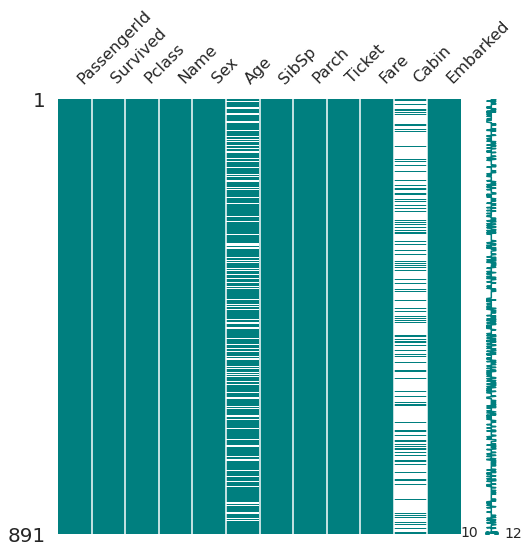

In [26]:
#msno로 null data 확인 방법.   
mano.matrix(df=df_train.iloc[:, :], figsize=(8,8), color = (0,0.5,0.5)) #iloc : index location, 내가 원하는 위치에 데이터 프레임을 가져옴
#빈칸이 null

In [27]:
df_train.iloc[:, 2:]#  :  -> 처음부터 끝까지

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


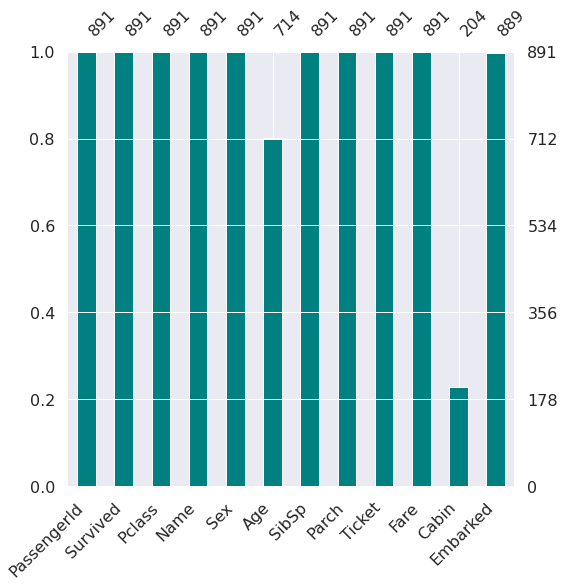

In [28]:
#bar로 보기
mano.bar(df=df_train.iloc[:, :], figsize=(8,8), color = (0,0.5,0.5)) #
#본인이 편한거 사용하기 


###Target lable이 얼마나 밸런스있게 dataset에 있는지가 굉장히 중요

-target label이 어떤 distribution을 가지고 있는지 확인해봐야한다.\
-지금 같은 binary classification 문제의 경우 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라 질 수 있다.

<function matplotlib.pyplot.show>

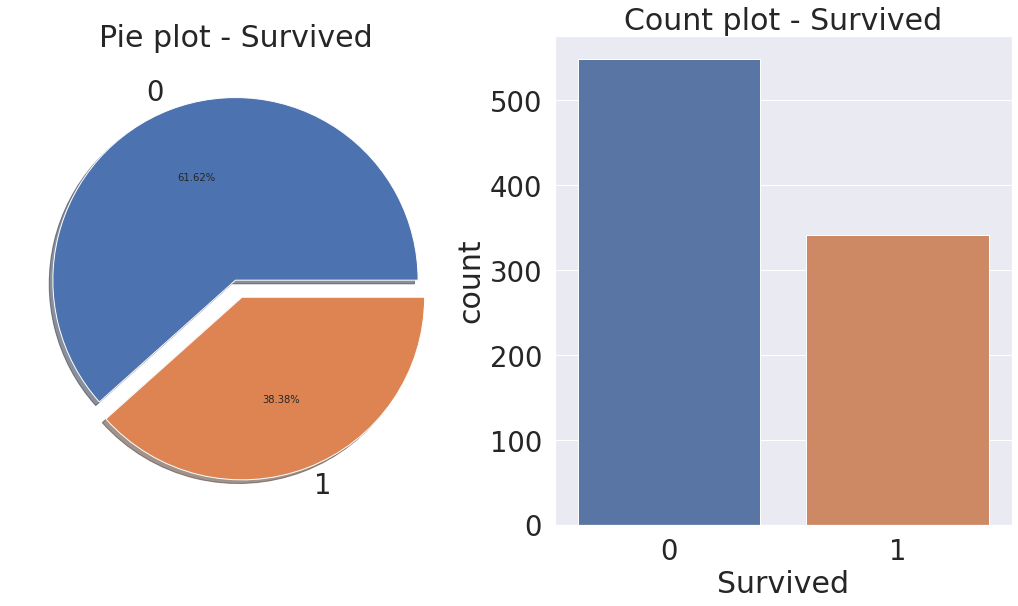

In [29]:
f, ax = plt.subplots(1,2,figsize=(18,9)) #도화지 준비, 1행의 2열의 그림

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0],shadow=True) #explode는 그림간 간격을 나누는 정도, autopct는 % 형식을 나타냄, ax[0]은 도화지 구간, shadow는 그림자 
ax[0].set_title('Pie plot - Survived') #도화자 첫번째에 제목 달아줌    
ax[0].set_ylabel('')#레이블 없앰
sns.countplot('Survived', data = df_train,ax=ax[1])  #df_train의 Survived column을 count해달라
ax[1].set_title('Count plot - Survived')
plt.show

In [30]:
df_train['Survived'].value_counts() #각 label의 갯수 반환, 그냥 count의 경우 총 개수 반환, 데이터 타입은 시리즈

0    549
1    342
Name: Survived, dtype: int64

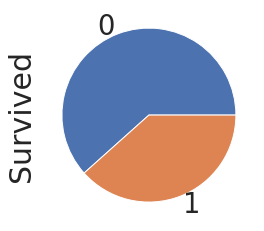

In [31]:
df_train['Survived'].value_counts().plot.pie()  #시리즈들은 항상 plot을 가짐 

In [32]:
df_train.shape #11개 feature중 어떤 것이 중요하고 어떤 상관관계가 있는지 파악하는 것이 매우 중요

(891, 12)

##2.1 Pclass
- 카테고리이면서 순서가 있는 데이터 



In [33]:
#pclass에 따른 생존률 변환
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).count()  #항상 방향성을 기억하기, dataframe을 pclass로 묶어줌, sum과 count구분하기

,Survived
Pclass,
1,216
2,184
3,491


In [34]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean() #pclass별 생존률

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [35]:
df_train[['Pclass','Survived']] #반드시 리스트 형식으로

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [36]:
df_train['Survived'].unique()

array([0, 1])

In [37]:
pd.crosstab(df_train['Pclass'],df_train['Survived'],margins=True).style.background_gradient(cmap='Blues_r') #margins은 ALL의 유무

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


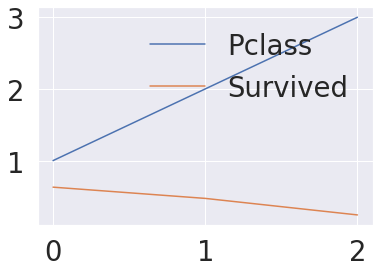

In [38]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived',ascending=False).plot() #Sort_value 오름차순으로 정리

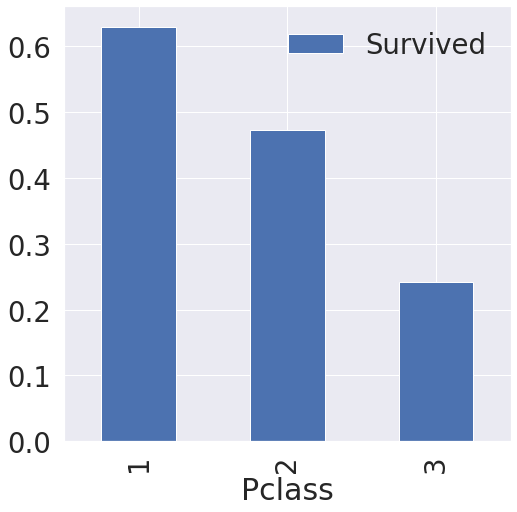

In [39]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(figsize=(8,8)) #Sort_value 오름차순으로 정리


### pclass가 높을수록 생존률이 높은것을 확인할 수 있다.

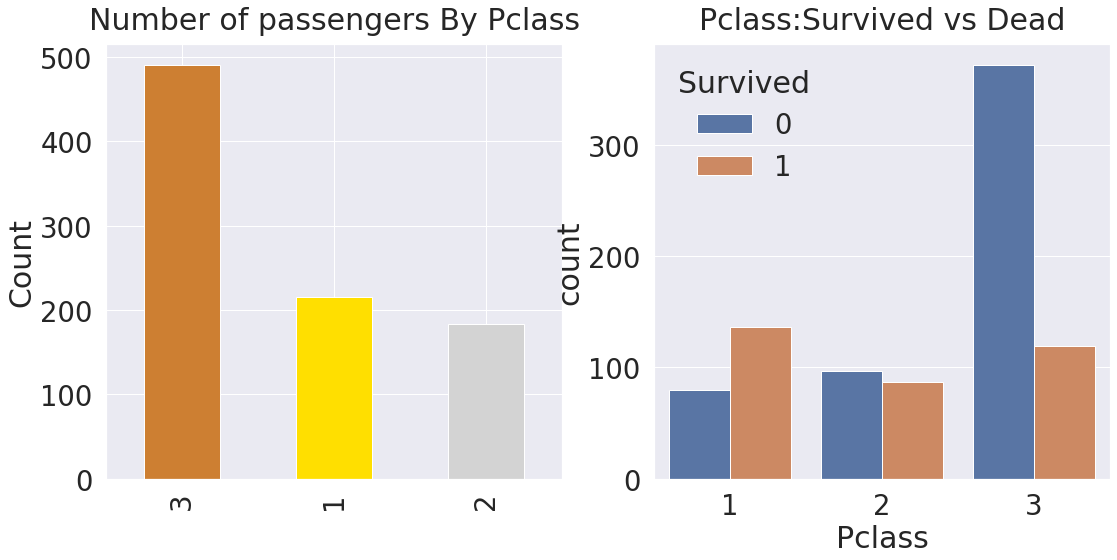

In [40]:
y_position = 1.02
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax =ax[0])
ax[0].set_title("Number of passengers By Pclass", y=y_position)
ax[0].set_ylabel("Count")
sns.countplot('Pclass', hue='Survived', data=df_train,ax=ax[1]) #hue를 통해 색을 구분
ax[1].set_title('Pclass:Survived vs Dead', y=y_position)
plt.show()   #클래스가 높을수록 생존확률이 높아진다. 

###2.2 EDA - 성별

Text(0.5, 1.0, 'Sex : Survived vs Dead')

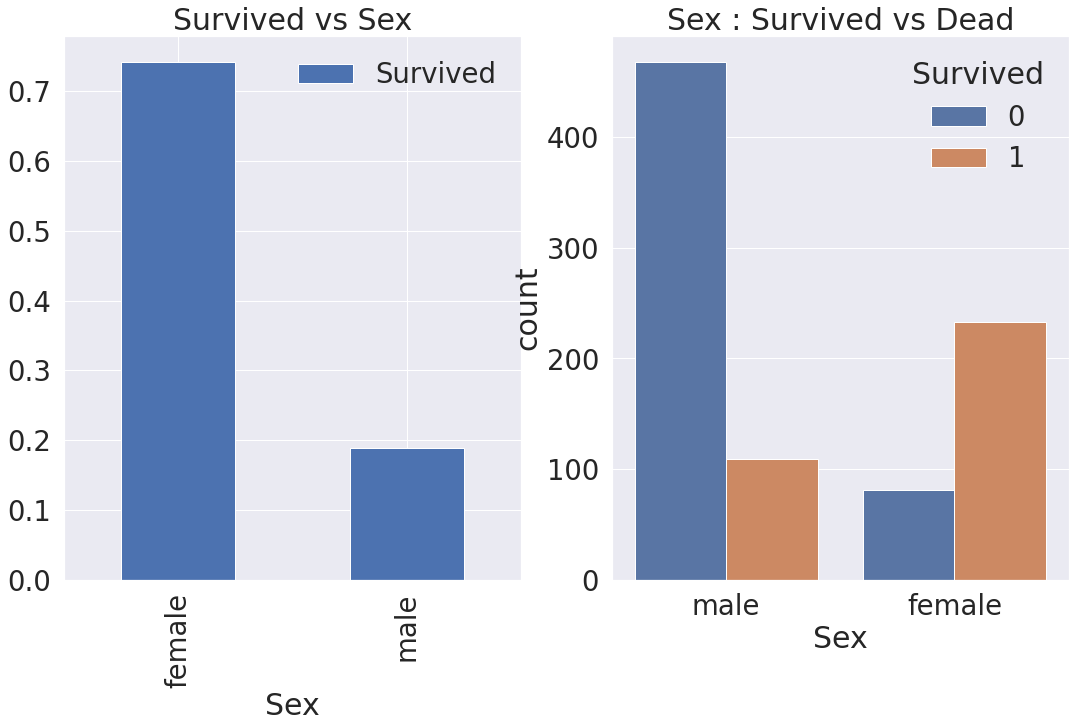

In [41]:
f , ax = plt.subplots(1,2,figsize=(18,10))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data = df_train, ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')

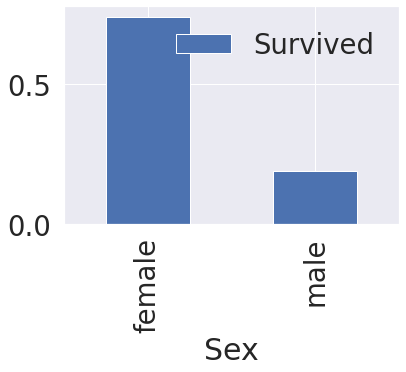

In [42]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index = True).mean().plot.bar()


In [43]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index = False).mean()


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [44]:
pd.crosstab(df_train['Sex'],df_train['Survived'],margins=True).style.background_gradient(cmap='Blues_r') #margins은 ALL의 유무

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


###2.3 both sex and pclass

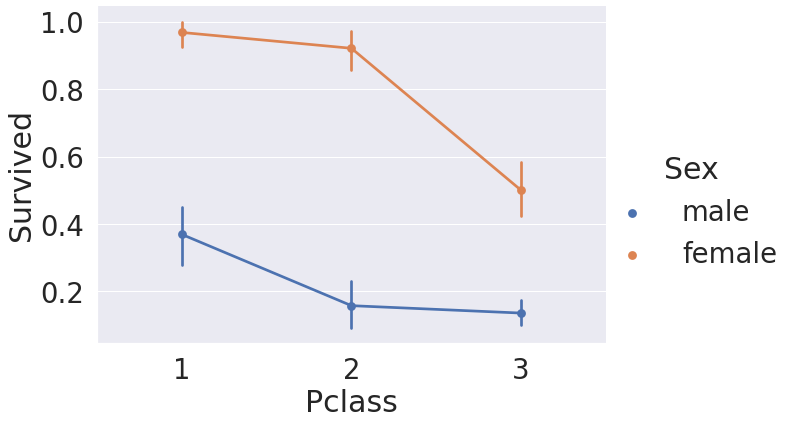

In [45]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data = df_train, size = 6, aspect=1.5)


*  lady first
*  Money brings survival?




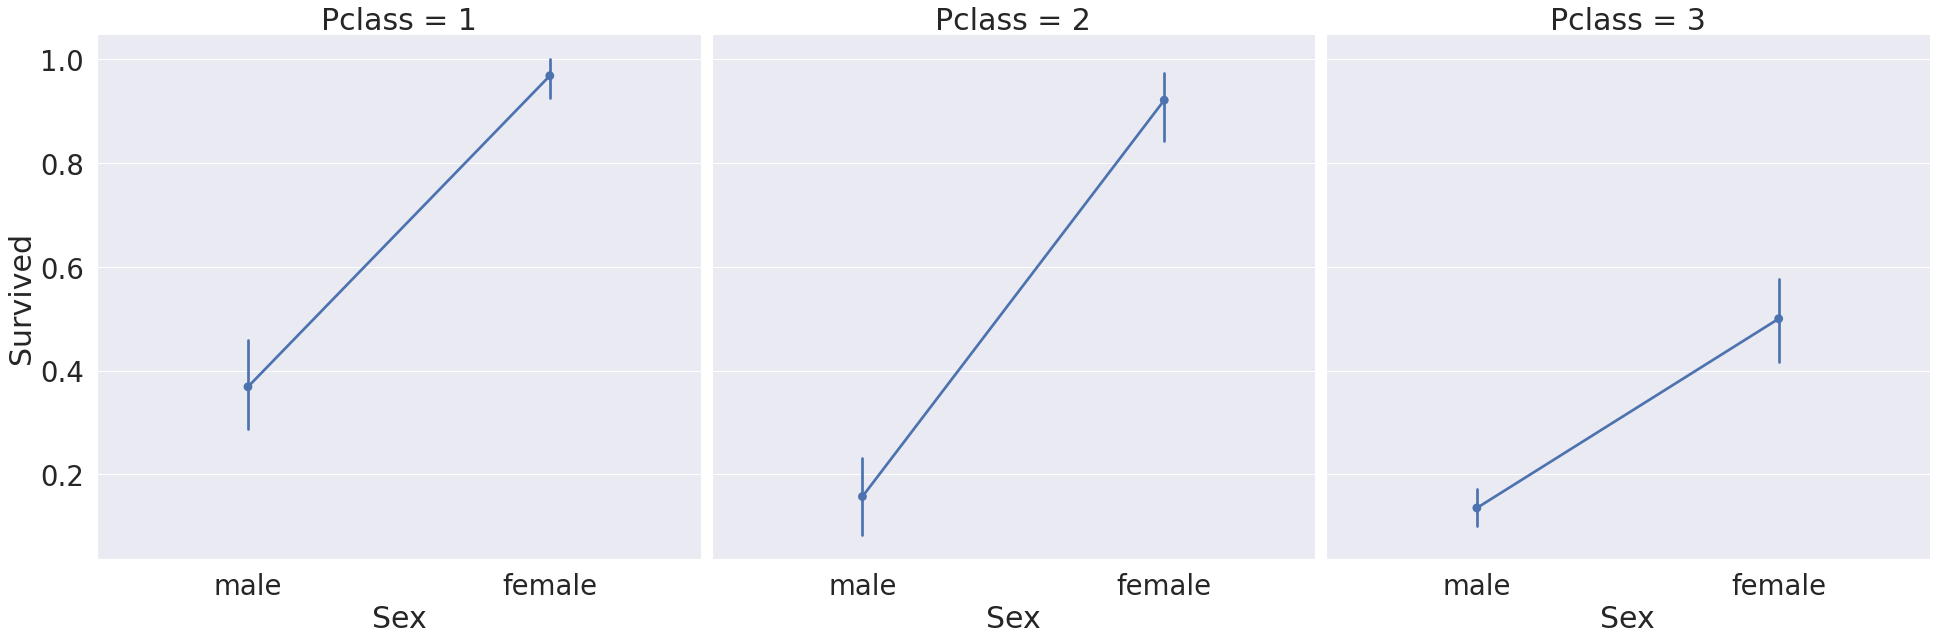

In [46]:
#factorplot 다르게 그리기
sns.factorplot(x='Sex', y = 'Survived', col='Pclass', data=df_train, saturation=.5, size=9, aspect=1)

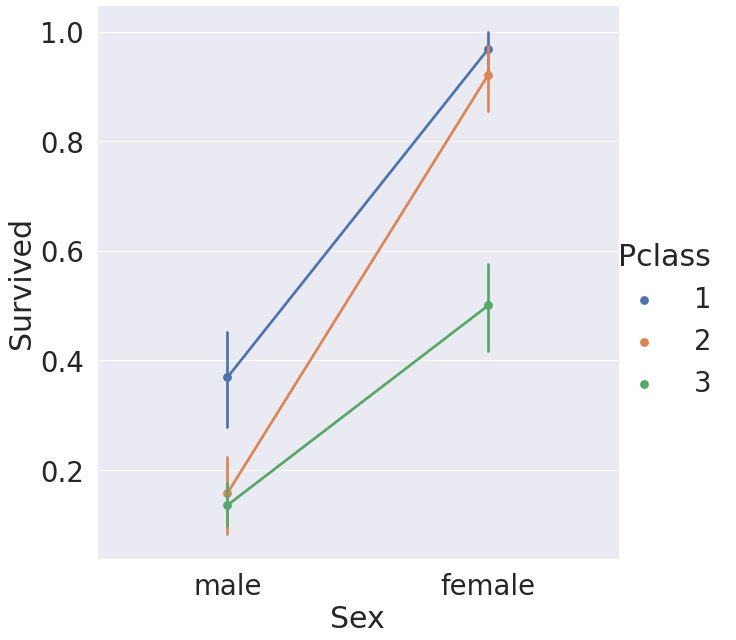

In [47]:
#factorplot 다르게 그리기
sns.factorplot(x='Sex', y = 'Survived', hue='Pclass', data=df_train, saturation=.5, size=9, aspect=1) 
#아래 그래프의 에러바는 신뢰도에 따라 길이가 달라짐 추가적으로 찾아볼 내용!!(표본의 오차 범위)

### 2.4 Age

In [48]:
print('제일 나이 많은 탑승객 : {: .1f} years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {: .1f} years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {: .1f} years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 :  80.0 years
제일 어린 탑승객 :  0.4 years
탑승객 평균 나이 :  29.7 years


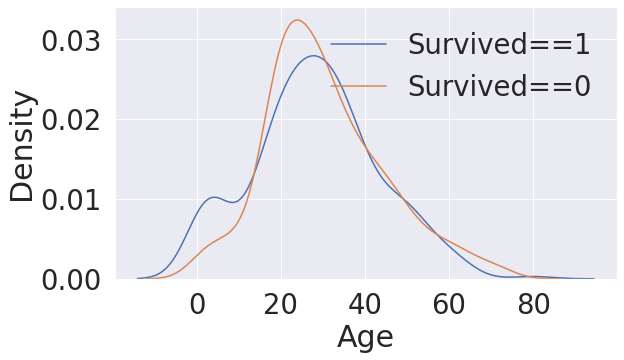

In [56]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)   #생존한 사람들의 나이만을 KDE로 그리기
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived==1', 'Survived==0'])
plt.show()
#KDE plot:  Kernel Density Estimator. 히스토그램 같은 분포를 부드럽게 곡선화(?)시켜서 그려주는 것
#부족한 통계내용은 바로바로 찾아서 공부하기

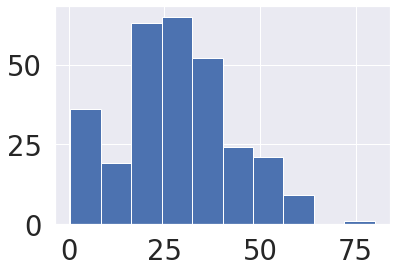

In [55]:
df_train[df_train['Survived']==1]['Age'].hist()

In [57]:
#pandas 인덱싱하는 방법
df_train.iloc[0,:]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [60]:
for row in df_train.iterrows():
    break

In [61]:
row

(0, PassengerId                          1
 Survived                             0
 Pclass                               3
 Name           Braund, Mr. Owen Harris
 Sex                               male
 Age                                 22
 SibSp                                1
 Parch                                0
 Ticket                       A/5 21171
 Fare                              7.25
 Cabin                              NaN
 Embarked                             S
 Name: 0, dtype: object)

In [62]:
df_train['Survived']==1

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

In [63]:
df_train[df_train['Survived']==1] #survived가 1인 데이터만 반환

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
#다른 문법으로 KDE plot 그리기 
#아래 세개 모두 같은 결과 (도화지를 준비하는 3가지 방법)
f = plt.figure(figsize=(10,10))
f, ax = plt.subplots(1,1,figsize=(10,10))
plt.figure(figsize=(10,10))



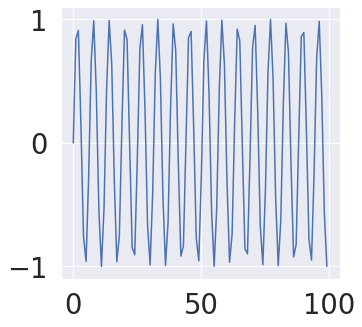

In [73]:
f = plt.figure(figsize=(5,5))
a = np.arange(100)
b = np.sin(a)

plt.plot(b)

Text(0.5, 0, 'sdf')

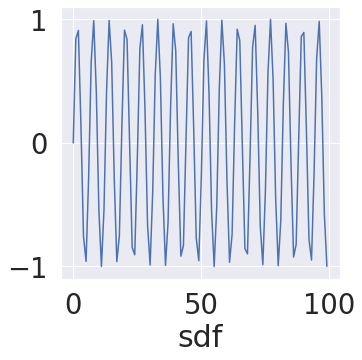

In [83]:
f, ax = plt.subplots(1,1,figsize=(5,5)) #축을 반환해줌
a = np.arange(100)
b = np.sin(a)

ax.plot(b)
ax.set_xlabel('sdf')

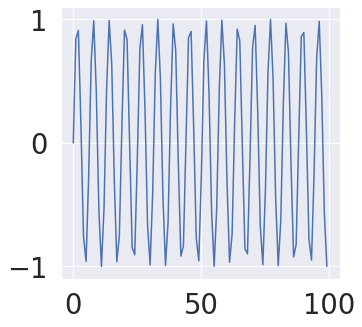

In [78]:
plt.figure(figsize=(5,5))
a = np.arange(100)
b = np.sin(a)

plt.plot(b)

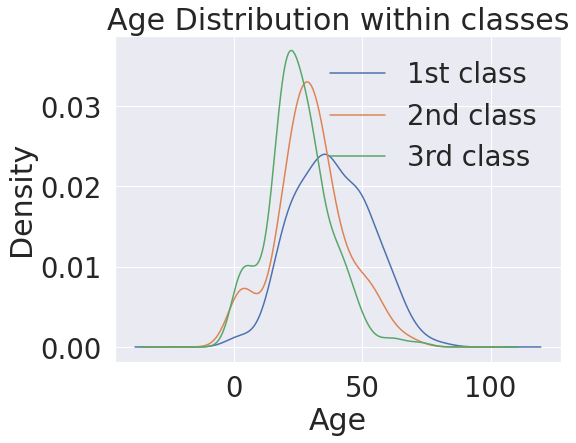

In [87]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind = 'kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st class','2nd class','3rd class'])


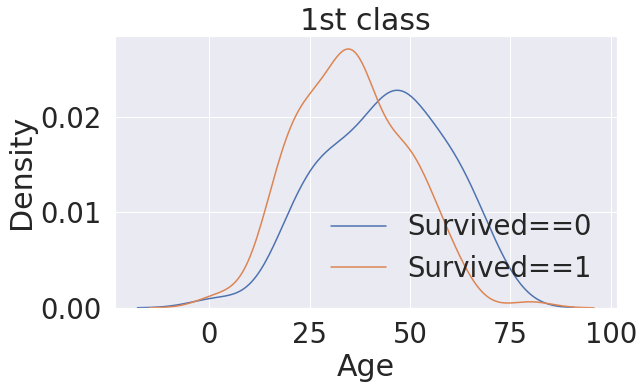

In [97]:
#class 별로 생존 확률의 distribution을 보고싶을때 
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived']==0)&(df_train['Pclass']==1)]['Age'], ax=ax) 
sns.kdeplot(df_train[(df_train['Survived']==1)&(df_train['Pclass']==1)]['Age'], ax=ax) 

plt.legend(['Survived==0', 'Survived==1'])
plt.title('1st class')

plt.show()


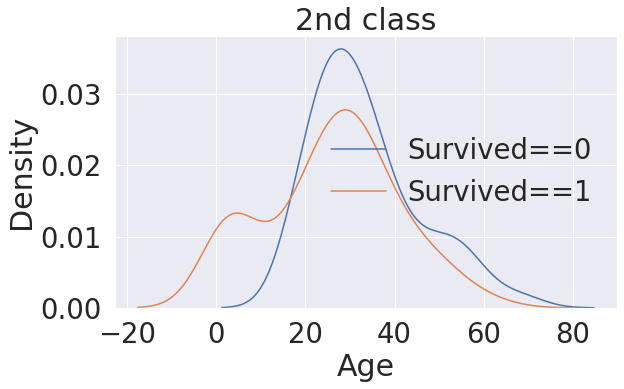

In [98]:
#class 별로 생존 확률의 distribution을 보고싶을때 
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived']==0)&(df_train['Pclass']==2)]['Age'], ax=ax) 
sns.kdeplot(df_train[(df_train['Survived']==1)&(df_train['Pclass']==2)]['Age'], ax=ax) 

plt.legend(['Survived==0', 'Survived==1'])
plt.title('2nd class')
plt.show()


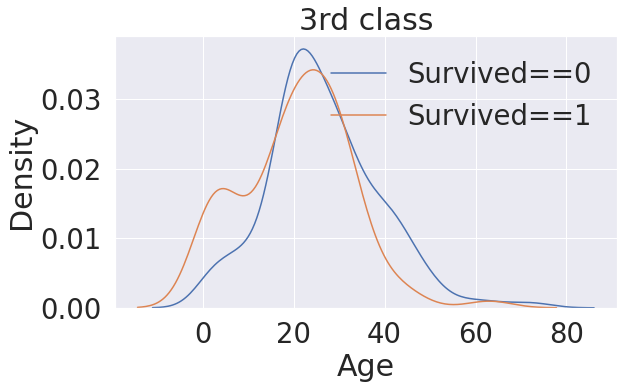

In [96]:
#class 별로 생존 확률의 distribution을 보고싶을때 
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived']==0)&(df_train['Pclass']==3)]['Age'], ax=ax) 
sns.kdeplot(df_train[(df_train['Survived']==1)&(df_train['Pclass']==3)]['Age'], ax=ax) 

plt.legend(['Survived==0', 'Survived==1'])
plt.title('3rd class')
plt.show()


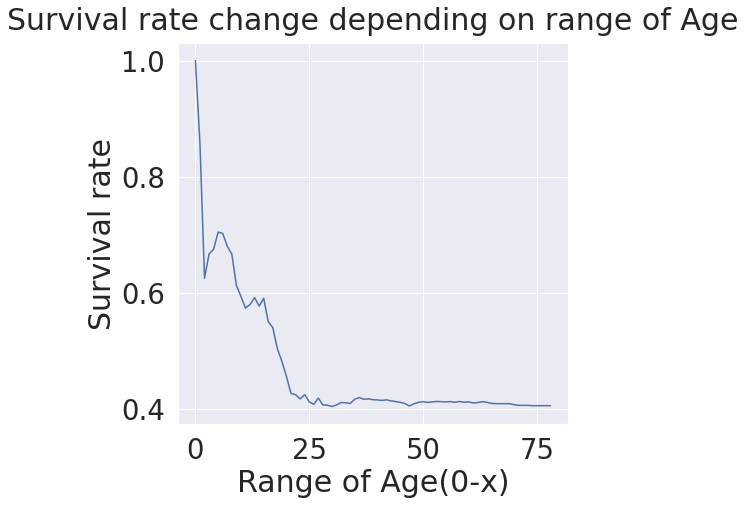

In [99]:
#age의 범위를 다르게 했을 때의 survival ratio가 어떻게 변화하는지 
change_age_survival_ratio = []

for i in range(1,80):
    change_age_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived']))


plt.figure(figsize=(7,7))
plt.plot(change_age_survival_ratio)
plt.title('Survival rate change depending on range of Age', y = 1.02 )
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0-x)')
plt.show()

나이가 어릴수록 생존 확률이 높은 것을 알 수 있다.